In [5]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import pandas as pd
from tqdm import tqdm

In [6]:
df = pd.read_csv("C:/resources/2weeks/DSA_features.csv", engine ="python")
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
5,7.965544,8.1304,7.8691,0.004233,0.065059,0.576279,1.150181,1.2274,1.07910,0.000746,...,0.000768,0.009040,-0.055772,-0.053614,-0.057971,7.603259e-07,0.000872,0.016200,sitting,p1
6,7.923159,8.0482,7.8543,0.001490,0.038600,0.807007,1.161473,1.2125,1.09410,0.000442,...,0.000759,-0.018338,-0.055931,-0.054186,-0.057954,7.299607e-07,0.000854,-0.090742,sitting,p1
7,7.941025,8.0559,7.8468,0.003056,0.055283,0.284582,1.166265,1.2418,1.09370,0.000501,...,0.000771,0.138991,-0.056112,-0.054114,-0.058301,7.268286e-07,0.000853,-0.129864,sitting,p1
8,7.882650,8.0483,7.6304,0.009832,0.099157,-0.062036,1.179440,1.2714,1.01980,0.001466,...,0.000857,-0.241564,-0.056329,-0.054376,-0.058577,7.286492e-07,0.000854,-0.051455,sitting,p1
9,7.902089,8.0484,7.8318,0.002280,0.047751,0.680589,1.212818,1.2713,1.16010,0.000399,...,0.000777,0.071582,-0.056273,-0.054379,-0.058204,5.838899e-07,0.000764,0.271062,sitting,p1


In [7]:
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max',
       'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity',
       'people'],
      dtype='object', length=272)

In [8]:
#activity열을 출력
df['activity'].value_counts()

sitting                    480
decendingStairs            480
runningTreadmill           480
crossTrainer               480
lyingBack                  480
jumping                    480
walkingTreadmillFlat       480
cyclingHorizontal          480
ascendingStairs            480
rowing                     480
cyclingVertical            480
basketBall                 480
walkingTreadmillIncline    480
lyingRigh                  480
stepper                    480
standingInElevatorStill    480
walkingLot                 480
standing                   480
movingInElevator           480
Name: activity, dtype: int64

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 레이블별 갯수 확인
label_counts = df['activity'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('Label Count')
plt.xlabel('Labels')
plt.ylabel('Count')

Text(0,0.5,'Count')

In [10]:
#해당 문자열이 포함된 모든 열을 저장
df_RA = df.filter(regex='RA_') 
df_LA = df.filter(regex='LA_') 

In [11]:
#데이터셋의 3번째 인덱스열에 activity라는 열을 만들고
#기존 데이터셋의 activity열을 가져와 넣어준다.
df_RA.insert(3, 'activity', df['activity'])
df_LA.insert(3, 'activity', df['activity'])

In [12]:
df_RA

,RA_xacc_mean,RA_xacc_max,RA_xacc_min,activity,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,...,RA_ymag_min,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew
0,0.679134,0.75930,0.58542,sitting,0.001546,0.039324,-0.415694,5.713088,5.8483,5.5956,...,-0.57428,0.000012,0.003401,-0.052190,-0.211136,-0.184010,-0.24523,0.000044,0.006638,-1.153902
1,0.644964,0.73158,0.53064,sitting,0.001333,0.036508,0.410625,5.795154,5.9546,5.6687,...,-0.57398,0.000005,0.002216,0.222740,-0.206431,-0.180540,-0.23624,0.000032,0.005660,0.458427
2,0.608212,0.67737,0.53546,sitting,0.000637,0.025244,0.153302,5.833086,5.8918,5.7656,...,-0.57563,0.000004,0.001954,-0.221765,-0.205648,-0.183420,-0.22933,0.000024,0.004868,-0.984915
3,0.591138,0.71177,0.51524,sitting,0.001349,0.036731,0.525019,5.863846,5.9645,5.7556,...,-0.57858,0.000007,0.002688,0.075011,-0.203739,-0.179990,-0.22958,0.000026,0.005099,0.185634
4,0.558168,0.67190,0.50535,sitting,0.000626,0.025020,1.076782,5.884745,5.9401,5.8384,...,-0.57996,0.000005,0.002278,-0.219440,-0.203684,-0.179040,-0.22924,0.000027,0.005175,-0.820907
5,0.559089,0.62268,0.51006,sitting,0.000567,0.023811,0.690420,5.901690,5.9498,5.8553,...,-0.57880,0.000004,0.001953,1.102780,-0.201944,-0.177830,-0.22492,0.000023,0.004819,0.763941
6,0.540004,0.59306,0.49022,sitting,0.000286,0.016898,0.129868,5.915167,5.9546,5.8625,...,-0.58279,0.000005,0.002170,-0.650696,-0.202174,-0.174620,-0.22933,0.000027,0.005203,-0.817497
7,0.537077,0.59728,0.48991,sitting,0.000448,0.021171,0.224971,5.931283,5.9837,5.8842,...,-0.58316,0.000006,0.002489,0.649105,-0.200392,-0.169120,-0.22984,0.000041,0.006366,0.810470
8,0.538192,0.61939,0.47966,sitting,0.001079,0.032846,0.331206,5.943086,6.0031,5.8575,...,-0.58469,0.000008,0.002815,-0.112814,-0.199643,-0.164760,-0.23316,0.000051,0.007146,-0.503793
9,0.485706,0.53814,0.44280,sitting,0.000314,0.017713,0.363395,5.985106,6.0321,5.9423,...,-0.58590,0.000006,0.002544,0.353879,-0.198586,-0.165510,-0.23220,0.000045,0.006696,0.838548


In [13]:
df_LA

,LA_xacc_mean,LA_xacc_max,LA_xacc_min,activity,LA_xacc_var,LA_xacc_std,LA_xacc_skew,LA_yacc_mean,LA_yacc_max,LA_yacc_min,...,LA_ymag_min,LA_ymag_var,LA_ymag_std,LA_ymag_skew,LA_zmag_mean,LA_zmag_max,LA_zmag_min,LA_zmag_var,LA_zmag_std,LA_zmag_skew
0,3.403317,3.4875,3.2682,sitting,0.001583,0.039790,-0.744647,-8.375713,-8.2927,-8.4821,...,0.337480,3.275688e-06,0.001810,-0.215069,0.072273,0.076374,0.067940,0.000004,0.001910,-0.166015
1,3.427302,3.6630,3.3168,sitting,0.004305,0.065614,1.000107,-8.397591,-8.3118,-8.5017,...,0.330000,1.729914e-05,0.004159,-0.611251,0.074557,0.085184,0.068169,0.000022,0.004643,0.717286
2,3.400870,3.5168,3.3315,sitting,0.001007,0.031732,0.978319,-8.439138,-8.3599,-8.5204,...,0.333070,1.731341e-06,0.001316,-0.506255,0.075852,0.083227,0.072507,0.000004,0.002106,1.043919
3,3.391002,3.5311,3.2608,sitting,0.001792,0.042328,0.117935,-8.441421,-8.3207,-8.5446,...,0.334310,1.947295e-06,0.001395,0.155251,0.074878,0.080059,0.069942,0.000006,0.002414,0.242524
4,3.359974,3.4434,3.3069,sitting,0.000633,0.025160,1.051627,-8.454854,-8.3202,-8.5561,...,0.336310,1.010815e-06,0.001005,-0.299017,0.073398,0.077461,0.070175,0.000002,0.001482,0.606258
5,3.342987,3.4531,3.2776,sitting,0.001201,0.034659,0.761024,-8.489431,-8.4197,-8.5919,...,0.334950,2.374994e-06,0.001541,-0.433770,0.076125,0.081044,0.072683,0.000004,0.001967,0.499923
6,3.313230,3.3895,3.2606,sitting,0.000519,0.022774,0.369784,-8.513732,-8.3613,-8.6013,...,0.338080,8.707636e-07,0.000933,-0.387835,0.075828,0.080312,0.073012,0.000003,0.001654,0.695225
7,3.310750,3.4093,3.2532,sitting,0.000998,0.031585,0.607063,-8.533283,-8.4381,-8.5938,...,0.336350,2.608857e-06,0.001615,-0.140823,0.077778,0.082577,0.073759,0.000005,0.002299,0.359200
8,3.326566,3.4358,3.2385,sitting,0.001228,0.035039,0.028676,-8.525914,-8.4162,-8.6980,...,0.336070,2.279800e-06,0.001510,-0.148780,0.078499,0.082988,0.073990,0.000005,0.002198,0.080807
9,3.321195,3.4089,3.2578,sitting,0.000739,0.027192,0.774842,-8.527843,-8.4499,-8.6249,...,0.335240,1.775982e-06,0.001333,-0.679683,0.077654,0.082561,0.074192,0.000003,0.001607,0.781834


In [14]:
df_LA['activity'].value_counts()

sitting                    480
decendingStairs            480
runningTreadmill           480
crossTrainer               480
lyingBack                  480
jumping                    480
walkingTreadmillFlat       480
cyclingHorizontal          480
ascendingStairs            480
rowing                     480
cyclingVertical            480
basketBall                 480
walkingTreadmillIncline    480
lyingRigh                  480
stepper                    480
standingInElevatorStill    480
walkingLot                 480
standing                   480
movingInElevator           480
Name: activity, dtype: int64

In [15]:
df_RA['activity'].value_counts()

sitting                    480
decendingStairs            480
runningTreadmill           480
crossTrainer               480
lyingBack                  480
jumping                    480
walkingTreadmillFlat       480
cyclingHorizontal          480
ascendingStairs            480
rowing                     480
cyclingVertical            480
basketBall                 480
walkingTreadmillIncline    480
lyingRigh                  480
stepper                    480
standingInElevatorStill    480
walkingLot                 480
standing                   480
movingInElevator           480
Name: activity, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df_RA['activity'] = label_encoder.fit_transform(df_RA['activity'])

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()
# 'label' 컬럼을 숫자로 변환
df_LA['activity'] = label_encoder.fit_transform(df_LA['activity'])

C:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [17]:
df_LA['activity'].value_counts()

15    480
18    480
8     480
16    480
1     480
9     480
17    480
2     480
10    480
3     480
7     480
11    480
4     480
12    480
5     480
13    480
6     480
14    480
0     480
Name: activity, dtype: int64

In [18]:
df_RA['activity'].value_counts()

15    480
18    480
8     480
16    480
1     480
9     480
17    480
2     480
10    480
3     480
7     480
11    480
4     480
12    480
5     480
13    480
6     480
14    480
0     480
Name: activity, dtype: int64

In [19]:
#df_RA 데이터에서 activity를 따로 빼낸다.
df_RA_Y=df_RA['activity']
df_RA_X=df_RA.drop('activity',axis=1)
df_RA_X.head()

,RA_xacc_mean,RA_xacc_max,RA_xacc_min,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,RA_yacc_var,...,RA_ymag_min,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew
0,0.679134,0.75930,0.58542,0.001546,0.039324,-0.415694,5.713088,5.8483,5.5956,0.003779,...,-0.57428,0.000012,0.003401,-0.052190,-0.211136,-0.18401,-0.24523,0.000044,0.006638,-1.153902
1,0.644964,0.73158,0.53064,0.001333,0.036508,0.410625,5.795154,5.9546,5.6687,0.001132,...,-0.57398,0.000005,0.002216,0.222740,-0.206431,-0.18054,-0.23624,0.000032,0.005660,0.458427
2,0.608212,0.67737,0.53546,0.000637,0.025244,0.153302,5.833086,5.8918,5.7656,0.000488,...,-0.57563,0.000004,0.001954,-0.221765,-0.205648,-0.18342,-0.22933,0.000024,0.004868,-0.984915
3,0.591138,0.71177,0.51524,0.001349,0.036731,0.525019,5.863846,5.9645,5.7556,0.001423,...,-0.57858,0.000007,0.002688,0.075011,-0.203739,-0.17999,-0.22958,0.000026,0.005099,0.185634
4,0.558168,0.67190,0.50535,0.000626,0.025020,1.076782,5.884745,5.9401,5.8384,0.000471,...,-0.57996,0.000005,0.002278,-0.219440,-0.203684,-0.17904,-0.22924,0.000027,0.005175,-0.820907


In [20]:
#훈련 데이터와 테스트 데이터로 분리
from sklearn.model_selection import train_test_split
X_train_RA, X_test_RA, y_train_RA, y_test_RA = train_test_split(df_RA_X, 
                                                    df_RA_Y,
                                                    test_size = 0.25, 
                                                    random_state = 21)

In [21]:
df_LA_Y = df_LA['activity']
df_LA_Y.head()

0    12
1    12
2    12
3    12
4    12
Name: activity, dtype: int64

In [22]:
df_LA_X=df_LA.drop('activity',axis=1)
df_LA_X.head()

,LA_xacc_mean,LA_xacc_max,LA_xacc_min,LA_xacc_var,LA_xacc_std,LA_xacc_skew,LA_yacc_mean,LA_yacc_max,LA_yacc_min,LA_yacc_var,...,LA_ymag_min,LA_ymag_var,LA_ymag_std,LA_ymag_skew,LA_zmag_mean,LA_zmag_max,LA_zmag_min,LA_zmag_var,LA_zmag_std,LA_zmag_skew
0,3.403317,3.4875,3.2682,0.001583,0.039790,-0.744647,-8.375713,-8.2927,-8.4821,0.001178,...,0.33748,0.000003,0.001810,-0.215069,0.072273,0.076374,0.067940,0.000004,0.001910,-0.166015
1,3.427302,3.6630,3.3168,0.004305,0.065614,1.000107,-8.397591,-8.3118,-8.5017,0.001098,...,0.33000,0.000017,0.004159,-0.611251,0.074557,0.085184,0.068169,0.000022,0.004643,0.717286
2,3.400870,3.5168,3.3315,0.001007,0.031732,0.978319,-8.439138,-8.3599,-8.5204,0.000684,...,0.33307,0.000002,0.001316,-0.506255,0.075852,0.083227,0.072507,0.000004,0.002106,1.043919
3,3.391002,3.5311,3.2608,0.001792,0.042328,0.117935,-8.441421,-8.3207,-8.5446,0.001862,...,0.33431,0.000002,0.001395,0.155251,0.074878,0.080059,0.069942,0.000006,0.002414,0.242524
4,3.359974,3.4434,3.3069,0.000633,0.025160,1.051627,-8.454854,-8.3202,-8.5561,0.001061,...,0.33631,0.000001,0.001005,-0.299017,0.073398,0.077461,0.070175,0.000002,0.001482,0.606258


In [23]:
from sklearn.model_selection import train_test_split

X_train_LA, X_test_LA, y_train_LA, y_test_LA = train_test_split(df_LA_X, 
                                                    df_LA_Y,
                                                    test_size = 0.25, 
                                                    random_state = 21)

<h3>왼팔과 오른팔을 각각 훈련과 테스트 데이터로 분리</h3>

In [24]:
X_train_RA.shape, X_test_RA.shape, y_train_RA.shape, y_test_RA.shape

((6840, 54), (2280, 54), (6840,), (2280,))

In [25]:
X_train_LA.shape, X_test_LA.shape, y_train_LA.shape, y_test_LA.shape

((6840, 54), (2280, 54), (6840,), (2280,))

In [26]:
from collections import Counter
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list()  # 빈 리스트를 생성하여 시퀀스 데이터와 레이블을 담을 공간을 만듦
    for i in range(len(sequences)):  # 전체 시퀀스 데이터를 순회
        # find the end of this pattern
        end_ix = i + n_steps  # 현재 인덱스(i)에서 n_steps만큼 떨어진 시퀀스의 끝을 계산
        # check if we are beyond the dataset
        if end_ix > len(sequences):  # 시퀀스 끝이 데이터의 범위를 넘어서는지 확인
            break  # 범위를 넘으면 루프 종료
        # gather input (X) and output parts (y)
        seq_x = sequences[i:end_ix, :-1]  # 입력 데이터 (특징 데이터)
        seq_y_values = sequences[i:end_ix, -1]  # 시퀀스 동안의 출력 데이터 (레이블들)
        
        # 가장 빈번하게 나온 레이블 찾기
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]
        
        X.append(seq_x)  # 입력 데이터 추가
        y.append(most_common_label)  # 가장 많이 나온 레이블 추가
    
    return np.array(X), np.array(y)  # 리스트를 numpy 배열로 변환하여 반환

In [27]:
# 입력과 출력을 하나의 배열로 결합
y_train_array_RA = np.array(y_train_RA)
train_set_RA = np.c_[X_train_RA, y_train_array_RA]

y_test_array_RA = np.array(y_test_RA)
test_set_RA = np.c_[X_test_RA, y_test_array_RA]

In [28]:
#3개의 데이터를 포함하도록 시퀀스 데이터를 생성
n_step = 3 

X_train_seq_RA, y_train_seq_RA = split_sequences(train_set_RA, n_step)
print(X_train_seq_RA.shape, y_train_seq_RA.shape)

X_test_seq_RA, y_test_seq_RA = split_sequences(test_set_RA, n_step)
print(X_test_seq_RA.shape, y_test_seq_RA.shape)

(6838, 3, 54) (6838,)
(2278, 3, 54) (2278,)


In [29]:
y_train_array_LA = np.array(y_train_LA)
train_set_LA = np.c_[X_train_LA, y_train_array_LA]

y_test_array_LA = np.array(y_test_LA)
test_set_LA = np.c_[X_test_LA, y_test_array_LA]

In [30]:
X_train_seq_LA, y_train_seq_LA = split_sequences(train_set_LA, n_step)
print(X_train_seq_LA.shape, y_train_seq_LA.shape)

X_test_seq_LA, y_test_seq_LA = split_sequences(test_set_LA, n_step)
print(X_test_seq_LA.shape, y_test_seq_LA.shape)

(6838, 3, 54) (6838,)
(2278, 3, 54) (2278,)


In [31]:
from tensorflow.keras.utils import to_categorical

# Convert output variables to categorical for CNN
y_train_seq_RA = to_categorical(y_train_seq_RA)
print(y_train_seq_RA.shape)

y_test_seq_RA = to_categorical(y_test_seq_RA)
print(y_test_seq_RA.shape)

(6838, 19)
(2278, 19)


In [32]:
y_train_seq_LA = to_categorical(y_train_seq_LA)
print(y_train_seq_LA.shape)

y_test_seq_LA = to_categorical(y_test_seq_LA)
print(y_test_seq_LA.shape)

(6838, 19)
(2278, 19)


In [33]:
#타임스텝 수, 특징 수, 클래스 수를 각각 저장함
n_timesteps, n_features, n_outputs = X_train_seq_RA.shape[1], X_train_seq_RA.shape[2], y_train_seq_RA.shape[1]
print(n_timesteps, n_features, n_outputs)

3 54 19


In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D

<h3>Sequential 모델을 사용해 LSTM 신경망 구축</h3>

In [36]:
model = Sequential()
model.add(LSTM(units=128, input_shape = (n_timesteps,n_features)))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               93696     
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 19)                2451      
Total params: 112,659
Trainable params: 112,659
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(X_train_seq_RA, y_train_seq_RA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/20
193/193 [==============================] - 1s 3ms/step - loss: 2.0724 - accuracy: 0.3369 - val_loss: 1.3868 - val_accuracy: 0.5336
Epoch 2/20
193/193 [==============================] - 0s 2ms/step - loss: 1.0791 - accuracy: 0.6562 - val_loss: 0.9476 - val_accuracy: 0.7485
Epoch 3/20
193/193 [==============================] - 0s 2ms/step - loss: 0.7560 - accuracy: 0.7751 - val_loss: 0.7702 - val_accuracy: 0.7792
Epoch 4/20
193/193 [==============================] - 0s 2ms/step - loss: 0.5866 - accuracy: 0.8247 - val_loss: 0.6811 - val_accuracy: 0.8056
Epoch 5/20
193/193 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.8609 - val_loss: 0.6573 - val_accuracy: 0.8246
Epoch 6/20
193/193 [==============================] - 0s 2ms/step - loss: 0.3950 - accuracy: 0.8814 - val_loss: 0.6181 - val_accuracy: 0.8260
Epoch 7/20
193/193 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.9046 - val_loss: 0.6266 - val_accuracy: 0.8275
Epoch 

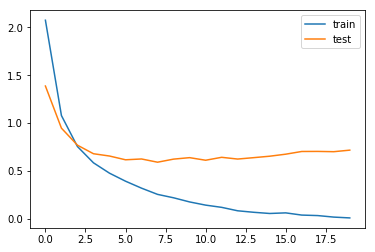

In [39]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [40]:
#훈련 데이터로 성능평가 실시
model.evaluate(X_train_seq_RA, y_train_seq_RA)

214/214 [==============================] - 0s 653us/step - loss: 0.0787 - accuracy: 0.9858


[0.07870756834745407, 0.9858145713806152]

In [41]:
#테스트 데이터로 성능평가 실시
model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 [==============================] - 0s 746us/step - loss: 0.6443 - accuracy: 0.8780


[0.6443002820014954, 0.877963125705719]

Confusion Matrix


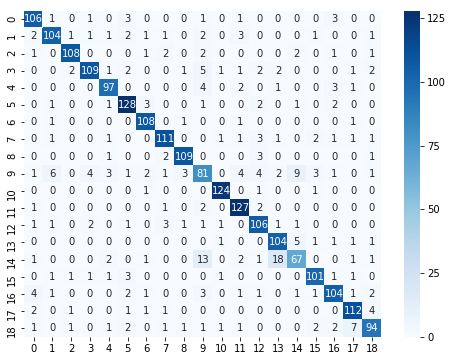

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq_RA, axis=1)
Y_pred = np.argmax(model.predict(X_test_seq_RA),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()

In [43]:
base_loss,base_accuracy=model.evaluate(X_test_seq_RA, y_test_seq_RA)

model_file='C:/resources/2weeks/RA_Model.h5'
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

72/72 [==============================] - 0s 676us/step - loss: 0.6443 - accuracy: 0.8780
model saved at  C:/resources/2weeks/RA_Model.h5
Accuracy >87.796313
Base Loss >0.64


In [44]:
model2 = Sequential()
model2.add(LSTM(units=128, input_shape = (n_timesteps,n_features)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(n_outputs, activation='softmax'))
model2.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [45]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               93696     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 19)                2451      
Total params: 112,659
Trainable params: 112,659
Non-trainable params: 0
_________________________________________________________________


In [46]:
history2 = model2.fit(X_train_seq_LA, y_train_seq_LA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/20
193/193 [==============================] - 1s 2ms/step - loss: 2.0417 - accuracy: 0.3616 - val_loss: 1.3022 - val_accuracy: 0.5716
Epoch 2/20
193/193 [==============================] - 0s 2ms/step - loss: 1.0139 - accuracy: 0.6698 - val_loss: 0.9039 - val_accuracy: 0.7135
Epoch 3/20
193/193 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.7964 - val_loss: 0.7041 - val_accuracy: 0.7836
Epoch 4/20
193/193 [==============================] - 0s 2ms/step - loss: 0.5142 - accuracy: 0.8534 - val_loss: 0.6264 - val_accuracy: 0.8231
Epoch 5/20
193/193 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8772 - val_loss: 0.5742 - val_accuracy: 0.8289
Epoch 6/20
193/193 [==============================] - 0s 2ms/step - loss: 0.3467 - accuracy: 0.8952 - val_loss: 0.5790 - val_accuracy: 0.8333
Epoch 7/20
193/193 [==============================] - 0s 1ms/step - loss: 0.2893 - accuracy: 0.9101 - val_loss: 0.5165 - val_accuracy: 0.8684
Epoch 

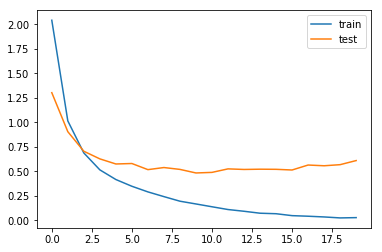

In [47]:
plt.plot(history2.history["loss"], label = "train")
plt.plot(history2.history["val_loss"], label = "test")
plt.legend()

In [48]:
model2.evaluate(X_train_seq_LA, y_train_seq_LA)

214/214 [==============================] - 0s 681us/step - loss: 0.0794 - accuracy: 0.9839


[0.07943028211593628, 0.9839134216308594]

In [49]:
model2.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 [==============================] - 0s 662us/step - loss: 0.6333 - accuracy: 0.8670


[0.6332677602767944, 0.8669885993003845]

Confusion Matrix


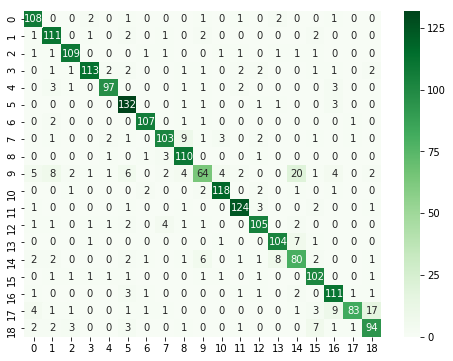

In [50]:
y_test_arg=np.argmax(y_test_seq_LA, axis=1)
Y_pred = np.argmax(model2.predict(X_test_seq_LA),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")

# 그래프 표시
plt.show()

In [51]:
base_loss,base_accuracy=model2.evaluate(X_test_seq_LA, y_test_seq_LA)

model_file2='C:/resources/2weeks/LA_Model.h5'
  
tf.keras.models.save_model(model2, model_file2, include_optimizer=False)
print('model saved at ', model_file2)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

72/72 [==============================] - 0s 620us/step - loss: 0.6333 - accuracy: 0.8670
model saved at  C:/resources/2weeks/LA_Model.h5
Accuracy >86.698860
Base Loss >0.63


<h1>Pre-trained Model</h1>

In [52]:
# Base 모델을 로드 (RA_Model.h5)
from tensorflow.keras.models import load_model

base_model = load_model(model_file)

In [53]:
base_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
base_model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 [==============================] - 0s 704us/step - loss: 0.6443 - accuracy: 0.8780


[0.6443002820014954, 0.877963125705719]

In [54]:
base_model.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 [==============================] - 0s 648us/step - loss: 7.0039 - accuracy: 0.2331


[7.003912448883057, 0.23309920728206635]

In [55]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  3


In [56]:
# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

In [57]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

def remove_last_layers(model, num_layers_to_remove):
    # 모델의 레이어를 하나씩 슬라이스해서 앞의 레이어만 가져옴
    model_layers = model.layers[:-num_layers_to_remove]  # 마지막 레이어부터 지정된 갯수만큼 제외
    new_model = models.Sequential(model_layers)  # 새로운 모델에 해당 레이어들만 추가
    return new_model


# 출력층부터 1개의 레이어를 삭제
new_model = remove_last_layers(base_model, 1)

# 새로운 출력층 추가
new_model.add(layers.Dense(256, activation='relu'))
new_model.add(layers.Dense(n_outputs, activation='softmax'))  # 예: 10개의 클래스
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               93696     
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 19)                4883      
Total params: 148,115
Trainable params: 37,907
Non-trainable params: 110,208
_________________________________________________________________


In [58]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.recurrent_v2.LSTM object at 0x00...,lstm,False
1,<keras.layers.core.Dense object at 0x000002968...,dense,False
2,<keras.layers.core.Dense object at 0x000002968...,dense_4,True
3,<keras.layers.core.Dense object at 0x000002968...,dense_5,True


In [59]:
history3 = new_model.fit(X_train_seq_LA, y_train_seq_LA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
193/193 [==============================] - 1s 2ms/step - loss: 1.7110 - accuracy: 0.4652 - val_loss: 1.3804 - val_accuracy: 0.5687
Epoch 2/20
193/193 [==============================] - 0s 880us/step - loss: 1.2943 - accuracy: 0.5817 - val_loss: 1.2838 - val_accuracy: 0.5906
Epoch 3/20
193/193 [==============================] - 0s 865us/step - loss: 1.1832 - accuracy: 0.6209 - val_loss: 1.2276 - val_accuracy: 0.6126
Epoch 4/20
193/193 [==============================] - 0s 865us/step - loss: 1.1107 - accuracy: 0.6393 - val_loss: 1.2094 - val_accuracy: 0.6155
Epoch 5/20
193/193 [==============================] - 0s 865us/step - loss: 1.0618 - accuracy: 0.6566 - val_loss: 1.1712 - val_accuracy: 0.6491
Epoch 6/20
193/193 [==============================] - 0s 932us/step - loss: 1.0223 - accuracy: 0.6755 - val_loss: 1.1563 - val_accuracy: 0.6316
Epoch 7/20
193/193 [==============================] - 0s 922us/step - loss: 0.9697 - accuracy: 0.6852 - val_loss: 1.1424 - val_accuracy: 0

In [60]:
new_model.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 [==============================] - 0s 662us/step - loss: 1.1117 - accuracy: 0.6536


[1.1117199659347534, 0.6536435484886169]

<h1>Fine Tunning 미세 조정</h1>

In [61]:
base_model.trainable = True
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [62]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.recurrent_v2.LSTM object at 0x00...,lstm,True
1,<keras.layers.core.Dense object at 0x000002968...,dense,True
2,<keras.layers.core.Dense object at 0x000002968...,dense_4,True
3,<keras.layers.core.Dense object at 0x000002968...,dense_5,True


In [63]:
history3 = new_model.fit(X_train_seq_LA, y_train_seq_LA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
193/193 [==============================] - 1s 3ms/step - loss: 0.6561 - accuracy: 0.7951 - val_loss: 0.7838 - val_accuracy: 0.7880
Epoch 2/20
193/193 [==============================] - 0s 2ms/step - loss: 0.4223 - accuracy: 0.8666 - val_loss: 0.8025 - val_accuracy: 0.7939
Epoch 3/20
193/193 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.8911 - val_loss: 0.7155 - val_accuracy: 0.8289
Epoch 4/20
193/193 [==============================] - 0s 2ms/step - loss: 0.2470 - accuracy: 0.9222 - val_loss: 0.7376 - val_accuracy: 0.8114
Epoch 5/20
193/193 [==============================] - 0s 2ms/step - loss: 0.2097 - accuracy: 0.9327 - val_loss: 0.7379 - val_accuracy: 0.8173
Epoch 6/20
193/193 [==============================] - 0s 2ms/step - loss: 0.1602 - accuracy: 0.9514 - val_loss: 0.6983 - val_accuracy: 0.8392
Epoch 7/20
193/193 [==============================] - 0s 2ms/step - loss: 0.1219 - accuracy: 0.9607 - val_loss: 0.7945 - val_accuracy: 0.8216
Epoch 

In [64]:
new_model.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 [==============================] - 0s 662us/step - loss: 0.8106 - accuracy: 0.8657


[0.8105607628822327, 0.8656716346740723]